We have provided some synthetic (fake, semi-randomly generated) twitter data in a csv file named project_twitter_data.csv which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. We have also words that express positive sentiment and negative sentiment, in the files positive_words.txt and negative_words.txt.

Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. You will create a csv file, which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, you upload the csv file to Excel or Google Sheets, and produce a graph of the Net Score vs Number of Retweets.

To start, define a function called strip_punctuation which takes one parameter, a string which represents a word, and removes characters considered punctuation from everywhere in the word. (Hint: remember the .replace() method for strings.)
```
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
def strip_punctuation(x):
    for p in punctuation_chars:
        x = x.replace(p,"")
    return x
```
Next, copy in your strip_punctuation function and define a function called get_pos which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered positive words. Use the list, positive_words to determine what words will count as positive. The function should return a positive integer - how many occurrences there are of positive words in the text. Note that all of the words in positive_words are lower cased, so you’ll need to convert all the words in the input string to lower case as well.
```
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
# list of positive words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())
            
print(positive_words)

def strip_punctuation(x):
    for p in punctuation_chars:
        x = x.replace(p,"")
    return x

def get_pos(x):
    x = strip_punctuation(x)
    strls = x.split()
    pwcnt=0
    for char in strls:
        if char.lower() in positive_words:
            pwcnt +=1
    return pwcnt
```
Next, copy in your strip_punctuation function and define a function called get_neg which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered negative words. Use the list, negative_words to determine what words will count as negative. The function should return a positive integer - how many occurrences there are of negative words in the text. Note that all of the words in negative_words are lower cased, so you’ll need to convert all the words in the input string to lower case as well.

```

punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

def strip_punctuation(x):
    for p in punctuation_chars:
        x = x.replace(p,"")
    return x

def get_neg(x):
    x = strip_punctuation(x)
    strls = x.split()
    pwcnt=0
    for char in strls:
        if char.lower() in negative_words:
            pwcnt +=1
    return pwcnt
```
Finally, copy in your previous functions and write code that opens the file project_twitter_data.csv which has the fake generated twitter data (the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet). Your task is to build a sentiment classifier, which will detect how positive or negative each tweet is. Copy the code from the code windows above, and put that in the top of this code window. Now, you will write code to create a csv file called resulting_data.csv, which contains the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score (how positive or negative the text is overall) for each tweet. The file should have those headers in that order. Remember that there is another component to this project. You will upload the csv file to Excel or Google Sheets and produce a graph of the Net Score vs Number of Retweets. Check Coursera for that portion of the assignment, if you’re accessing this textbook from Coursera.

In [ ]:

punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
# lists of words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

            
def strip_punctuation(x):
    for p in punctuation_chars:
        x = x.replace(p,"")
    return x

def get_pos(x):
    x = strip_punctuation(x)
    strls = x.split()
    pwcnt=0
    for char in strls:
        if char.lower() in positive_words:
            pwcnt +=1
    return pwcnt

def get_neg(x):
    x = strip_punctuation(x)
    strls = x.split()
    pwcnt=0
    for char in strls:
        if char.lower() in negative_words:
            pwcnt +=1
    return pwcnt            

fileread = open("project_twitter_data.csv","r")
lines = fileread.readlines()
print(lines[1])
outfile = open("resulting_data.csv", "w")
outfile.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score')
outfile.write('\n')
for line in lines[1:]:
    line_ls = line.replace("\n","").split(",")
    row_string = '{}, {}, {}, {}, {}'.format(int(line_ls[1]), int(line_ls[2]), get_pos(line_ls[0]),get_neg(line_ls[0]),get_pos(line_ls[0])-get_neg(line_ls[0]))
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()


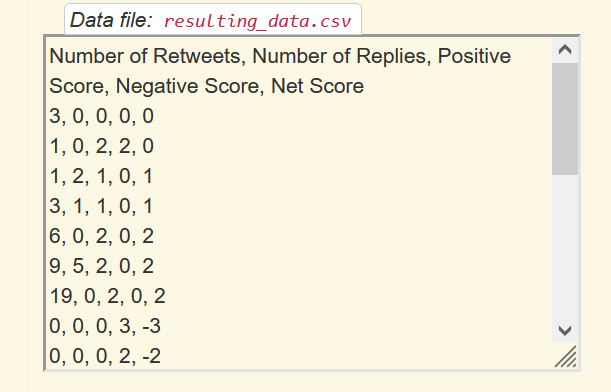

In [3]:
import pandas as pd
dt = pd.read_csv("resulting_data.txt")

In [7]:
dt.head()

,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,2,2,0
2,1,2,1,0,1
3,3,1,1,0,1
4,6,0,2,0,2


In [15]:
dt.columns

Index(['Number of Retweets', ' Number of Replies', ' Positive Score',
       ' Negative Score', ' Net Score'],
      dtype='object')

In [16]:
dt.index

RangeIndex(start=0, stop=19, step=1)

In [10]:
dt.dtypes

Number of Retweets    int64
 Number of Replies    int64
 Positive Score       int64
 Negative Score       int64
 Net Score            int64
dtype: object

In [22]:
dt[' Net Score']

0     0
1     0
2     1
3     1
4     2
5     2
6     2
7    -3
8    -2
9     4
10   -1
11    1
12    2
13    1
14    1
15    1
16    3
17    2
18    0
Name:  Net Score, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


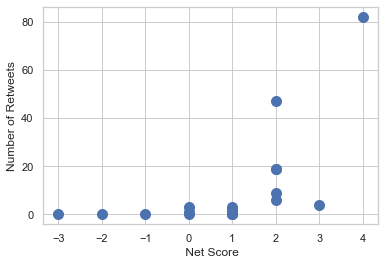

In [29]:
dt.plot.scatter(x = ' Net Score', y = 'Number of Retweets', s = 100);

# Some Drafts

In [30]:
import seaborn
seaborn.scatterplot(x=" Net Score",
                    y="Number of Retweets",
                    data=fmri)

ValueError: Could not interpret value ` Net Score` for parameter `x`

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

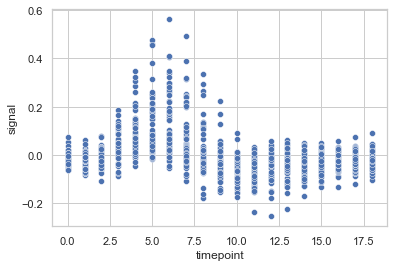

In [12]:
import seaborn
 
 
seaborn.set(style='whitegrid')
fmri = seaborn.load_dataset("fmri")
 
seaborn.scatterplot(x="timepoint",
                    y="signal",
                    data=fmri)

In [13]:
fmri.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object